<a href="https://colab.research.google.com/github/CleliaCaetano/Instagram_users-datetime-posts-data/blob/main/Instagram_users_datetime_posts_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks:
- As a social media platform operator offering various features such as posts, messaging, and recommendations, we aim to improve user engagement and optimize personalized content delivery.
- To achieve this, we seek to analyze and categorize user behavior patterns based on their activity on the platform.

In [1]:
# Import Libraries:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Visualization
import seaborn as sns # provide statistical graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# We can suppress the warnings messages that may appear when we run our code.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv('Instagram_users-datetime-posts-data.csv')
df.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,12/05/2019 21:18,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,12/05/2019 14:25,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,03/05/2019 15:18,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,02/05/2019 16:40,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,25/04/2019 16:51,2019,4,25,16,51


In [3]:
# check the category of each column.
# check which columns contains categorical variables (object) and numerical variables (int64, float64).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


**Note:** The dataset contains two distinct types of data:

- Numerical Data: Columns with int64 or float64 data types, representing quantitative values (e.g., Likes, Days Since Post, Year, etc.).
- Categorical Data: Columns with object data types, representing categorical or qualitative information (e.g., Type, Date Posted).

Exploratory data analysis (EDA)

In [4]:
# calculate the number of unique values in each column.
df.nunique(axis = 0)

,0
User uuid,1089
Likes,46384
Days passed from post,2913
Likes Score,101
Type,3
Numer of Tags,32
Numer of Comments,6606
Date Posted,162417
Year,12
Month,12


In [5]:
# drop columns that are irrelevant.
df.drop(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Numer of Tags', 'Numer of Comments'],
            axis=1, inplace=True)

In [6]:
# check the first 5 rows.
df.head(5)

,Type,Date Posted,Year,Month,Day,Hour,Minute
0,Image,12/05/2019 21:18,2019,5,12,21,18
1,Image,12/05/2019 14:25,2019,5,12,14,25
2,Images,03/05/2019 15:18,2019,5,3,15,18
3,Images,02/05/2019 16:40,2019,5,2,16,40
4,Images,25/04/2019 16:51,2019,4,25,16,51


Missing Values

In [7]:
# display the missing values
df.isnull().sum()

,0
Type,0
Date Posted,0
Year,0
Month,0
Day,0
Hour,0
Minute,0


Visualizations: Primary Analysis

Unique values in the 'Type'

In [8]:
# Count the number of occurrences of unique values in the 'Type' column
type_counts = df['Type'].value_counts()

# Create a new DataFrame to combine counts
type_summary = pd.DataFrame({
    'Count': type_counts
})

# Create an interactive bar chart with Plotly
fig = go.Figure()

# Use the 'Viridis' color scale and map it to the 'Count' values
fig.add_trace(go.Bar(
    x=type_summary.index,
    y=type_summary['Count'],
    marker=dict(
        color=type_summary['Count'],  # Color bars based on count
        colorscale='Viridis',  # Apply the Viridis color scale
        showscale=True  # Display color scale
    )
))

# Update layout to make it more interactive
fig.update_layout(
    title='Distribution of Users by Type between 2014 and 2020',
    xaxis_title='Type',
    yaxis_title='Count',
    plot_bgcolor='lightgrey',  # Set background to grey
    paper_bgcolor='lightgrey',  # Set paper background to grey
    font=dict(color='black'),  # Set font color to black for contrast
    hovermode='closest',  # Enable hover
    height=400,  # Adjust height of the plot
    width=600,  # Adjust width of the plot
)

# Show the interactive plot
fig.show()

In [9]:
# Get the first and last date in the 'Date Posted' column
first_date = df['Date Posted'].min()
last_date = df['Date Posted'].max()

# Print the first and last date
print(f"First date in the dataset: {first_date}")
print(f"Last date in the dataset: {last_date}")

First date in the dataset: 01/01/2014 02:06
Last date in the dataset: 31/12/2020 23:58


Groupby `type` and `year`
- Compare the counts for 2020 vs. previous years

In [10]:
# Groupby 'type' and 'year', then count the occurrences of each type by year
grouped = df.groupby(['Type', 'Year']).size().reset_index(name='count')

# Extract data for 2020
df_2020 = grouped[grouped['Year'] == 2020]

# Calculate the average count for previous years for each type
previous_years = grouped[grouped['Year'] < 2020]
average_previous_years = previous_years.groupby('Type')['count'].mean().reset_index()

# Merge 2020 data with the average previous years' data
merged = pd.merge(df_2020, average_previous_years, on='Type', suffixes=('_2020', '_avg'))

# Calculate the percentage increase for each type
merged['percentage_increase'] = ((merged['count_2020'] - merged['count_avg']) / merged['count_avg']) * 100

# Display the results
print(merged[['Type', 'count_2020', 'count_avg', 'percentage_increase']])

     Type  count_2020  count_avg  percentage_increase
0   Image       53536     4684.5          1042.832746
1  Images       21412     3115.0           587.383628
2   Video       16929      991.0          1608.274470


In [11]:
import plotly.express as px

# Create an interactive bar plot without displaying the values
fig = px.bar(
    merged,
    x='Type',
    y='percentage_increase',
    title="Percentage Increase in Counts from previous years to 2020 by Type",
    labels={'percentage_increase': 'Percentage Increase (%)', 'Type': 'Type'},
    color='percentage_increase',
    color_continuous_scale='Viridis',  # Color scale can be adjusted
)

# Update the layout for a smaller size and grey background
fig.update_layout(
    plot_bgcolor='lightgrey',  # Grey background for the plot
    paper_bgcolor='lightgrey',  # Grey background for the paper (outside plot)
    width=600,  # Set the width of the graph
    height=400,  # Set the height of the graph
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the title's position
)

# Show the plot
fig.show()

In [12]:
# convert the 'Date Posted' column to the datetime64[ns] format to performing specific types of analysis.
df['Date Posted'] = df['Date Posted'].astype('datetime64[ns]')

In [13]:
# set the 'Date Posted' column as the index label (making that column the primary reference point).
df.set_index('Date Posted', inplace=True)

Outliers

In [14]:
# Selecting numerical columns for outlier detection, including 'Year'
numeric_columns = ['Month', 'Day', 'Hour', 'Minute']  # Excluding 'Year' for separate plotting

# Define custom colors for the boxes, including 'Year'
box_colors = {
    'Month': 'lightblue',
    'Day': 'lightgreen',
    'Hour': 'lightcoral',
    'Minute': 'lightsalmon',
}

# Create subplots: 1 row and 2 columns (one for the other columns and one for 'Year')
fig = make_subplots(
    rows=1, cols=2,  # 1 row, 2 columns
    subplot_titles=['Columns (Month, Day, Hour, Minute)', 'Year'],
    shared_yaxes=False,  # Separate y-axes for each subplot
    column_widths=[0.7, 0.3]  # Adjust widths for better space distribution
)

# Add box plots for the other numeric columns in the first subplot
for i, column in enumerate(numeric_columns):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean='sd',  # Add a mean and standard deviation for better visibility
        fillcolor=box_colors.get(column, 'lightgray'),  # Set box fill color from dictionary
        line=dict(color='white'),  # Set outline color for the box
        marker=dict(color='black'),  # Set color for the outlier markers
        boxpoints='outliers',  # Show only outliers, not all points
        jitter=0.5,  # Spread out the outliers slightly for clarity
        pointpos=0,  # Position of the outliers on the x-axis
    ), row=1, col=1)  # Plot in the first column (other columns)

# Add box plot for the 'Year' column in the second subplot
fig.add_trace(go.Box(
    y=df['Year'],
    name='Year',
    boxmean='sd',  # Add a mean and standard deviation for better visibility
    fillcolor='lightyellow',  # Custom color for 'Year'
    line=dict(color='white'),  # Set outline color for the box
    marker=dict(color='black'),  # Set color for the outlier markers
    boxpoints='outliers',  # Show only outliers, not all points
    jitter=0.5,  # Spread out the outliers slightly for clarity
    pointpos=0,  # Position of the outliers on the x-axis
), row=1, col=2)  # Plot in the second column ('Year')

# Update layout for the combined plot with multiple subplots
fig.update_layout(
    title='Box Plots for Outlier Detection',
    plot_bgcolor='lightgrey',  # Set background color
    paper_bgcolor='lightgrey',  # Set paper background color
    font=dict(color='black'),  # Set font color
    height=600,  # Adjust height of the plot
    width=1000,  # Adjust width of the plot
    showlegend=False  # Disable legend to make it simpler
)

# Show the combined plot with separate subplots
fig.show()

Descriptive Statistics

In [15]:
# check the size of tha DataFrame (rows and columns).
df.shape

(178922, 6)

In [16]:
# compute and interpret the mean, median, quartiles and standard deviation of the dataset.
df.describe().round(2)

,Year,Month,Day,Hour,Minute
count,178922.00,178922.00,178922.00,178922.00,178922.00
mean,2019.41,6.76,15.69,13.40,28.74
std,1.37,3.75,8.82,7.39,17.68
min,2010.00,1.00,1.00,0.00,0.00
25%,2019.00,3.00,8.00,7.00,13.00
50%,2020.00,7.00,16.00,16.00,29.00
75%,2020.00,10.00,23.00,20.00,44.00
max,2021.00,12.00,31.00,23.00,59.00


Normal Distribution (Shapiro-Wilk Test)

Shapiro-Wilk Test for 'Year':
Statistic: 0.7878, p-value: 0.0000
The data in column 'Year' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Month':
Statistic: 0.9122, p-value: 0.0000
The data in column 'Month' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Day':
Statistic: 0.9545, p-value: 0.0000
The data in column 'Day' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Hour':
Statistic: 0.9007, p-value: 0.0000
The data in column 'Hour' does not follow a normal distribution.
--------------------------------------------------
Shapiro-Wilk Test for 'Minute':
Statistic: 0.9509, p-value: 0.0000
The data in column 'Minute' does not follow a normal distribution.
--------------------------------------------------


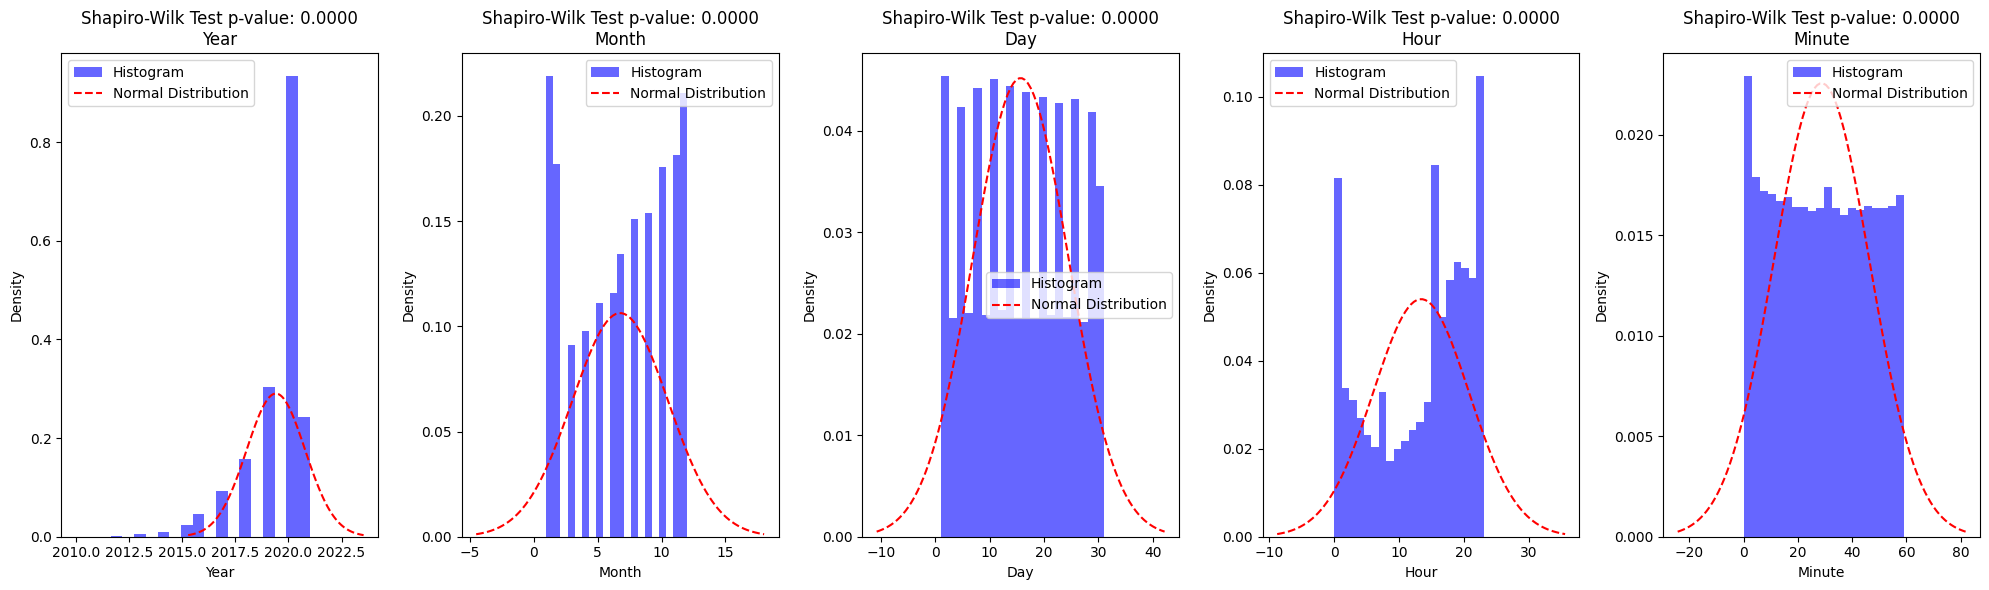

In [17]:
# List of columns to check for normality
columns_to_test = ['Year', 'Month', 'Day', 'Hour', 'Minute']

# Create subplots (1 row and 5 columns, adjust based on your columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Initialize lists to store Shapiro-Wilk test results
shapiro_p_values = []

# Loop over each column to test for normality using Shapiro-Wilk test
for i, column in enumerate(columns_to_test):
    # Perform Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p_value = stats.shapiro(df[column].dropna())  # dropna to remove NaN values

    # Store p-values
    shapiro_p_values.append(shapiro_p_value)

    # Output the Shapiro-Wilk test result and interpretation
    print(f"Shapiro-Wilk Test for '{column}':")
    print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")

    # Interpretation based on the p-value
    if shapiro_p_value > 0.05:
        print(f"The data in column '{column}' follows a normal distribution.")
    else:
        print(f"The data in column '{column}' does not follow a normal distribution.")

    print("-" * 50)

    # Plot the histogram and normal distribution curve
    column_data = df[column]

    # Calculate mean and standard deviation for the normal distribution curve
    mean = np.mean(column_data)
    std_dev = np.std(column_data)

    # Create a range of values for the x-axis (within 3 standard deviations)
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

    # Calculate the normal distribution (PDF) using the mean and standard deviation
    pdf = stats.norm.pdf(x, mean, std_dev)

    # Plot the histogram and normal distribution curve
    axes[i].hist(column_data, bins=20, density=True, alpha=0.6, color='blue', label='Histogram')
    axes[i].plot(x, pdf, color='red', linestyle='--', label='Normal Distribution')
    axes[i].set_title(f"Shapiro-Wilk Test p-value: {shapiro_p_value:.4f}\n{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

**Note:** The Shapiro-Wilk test indicates that the data in the Year, Month, Day, Hour, and Minute columns does not follow a normal distribution. This finding is expected due to the time-based nature of the dataset. Non-normality is often observed in data influenced by cyclic patterns and external temporal factors.

Feature Engineering

In [18]:
# Extract time-based features from the index (which is 'Date Posted')
df['Hour'] = df.index.hour  # Hour of the day (0-23)
df['Day'] = df.index.day    # Day of the month (1-31)
df['Month'] = df.index.month  # Month of the year (1-12)
df['Minute'] = df.index.minute  # Minute of the hour (0-59)

# Extract additional features like Day of the Week
df['Day_of_Week'] = df.index.day_name()  # Day name (e.g., Monday, Tuesday)

# Feature Engineering: Classify days as 'Weekday' or 'Weekend' based on Day_of_Week
weekday_to_weekend = {
    'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday',
    'Saturday': 'Weekend', 'Sunday': 'Weekend'
}

# Create a new column 'Day_Type' that classifies days as 'Weekday' or 'Weekend'
df['Day_Type'] = df['Day_of_Week'].map(weekday_to_weekend)

# Create a categorical feature for the time of day (Morning, Afternoon, Evening, Night)
df['Time_of_Day'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Display the first few rows of the dataframe after feature engineering
print(df[['Month', 'Day', 'Hour', 'Minute', 'Day_of_Week', 'Day_Type', 'Time_of_Day']].head())


                     Month  Day  Hour  Minute Day_of_Week Day_Type Time_of_Day
Date Posted                                                                   
2019-12-05 21:18:00     12    5    21      18    Thursday  Weekday     Evening
2019-12-05 14:25:00     12    5    14      25    Thursday  Weekday   Afternoon
2019-03-05 15:18:00      3    5    15      18     Tuesday  Weekday   Afternoon
2019-02-05 16:40:00      2    5    16      40     Tuesday  Weekday   Afternoon
2019-04-25 16:51:00      4   25    16      51    Thursday  Weekday   Afternoon


Trend & Pattern Analysis
- Purpose: analyze variations in user activity over time by focusing on hourly, daily, and monthly patterns while observing trends in the data, such as peak activity times and periods of decline.

1- Visualize Overall Activity Trends Across Time Using GroupBy Function.

In [19]:
# Set the common layout properties for all plots
layout = dict(
    plot_bgcolor='lightgrey',  # Set background color
    paper_bgcolor='lightgrey',  # Set paper background
    font=dict(color='black'),  # Set text color
    hovermode='closest',
    height=300,  # Adjust the height of the plot
    width=600,  # Adjust the width of the plot
)

In [20]:
# Plot activity by hour of the day (line plot)
hourly_activity = df.groupby('Hour').size().reindex(range(0, 24), fill_value=0)  # Ensure every hour from 0 to 23 is included

fig_hourly = go.Figure()

fig_hourly.add_trace(go.Scatter(
    x=hourly_activity.index,
    y=hourly_activity.values,
    mode='lines+markers',
    line=dict(color='skyblue'),
    marker=dict(size=8, color='skyblue')
))

fig_hourly.update_layout(
    title='Activity Distribution by Hour of the Day',
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Posts',
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1,
        tickangle=45  # Rotate x-axis labels by 45 degrees
    )
)

fig_hourly.update_layout(layout)  # Apply common layout properties
fig_hourly.show()

In [21]:
# Plot activity by day of the week (line plot)
activity_by_day = df.groupby('Day_of_Week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                                                            'Sunday'])

fig_day_of_week = go.Figure()

fig_day_of_week.add_trace(go.Scatter(
    x=activity_by_day.index,
    y=activity_by_day.values,
    mode='lines+markers',
    line=dict(color='salmon'),
    marker=dict(size=8, color='salmon')
))

fig_day_of_week.update_layout(
    title='Activity Distribution by Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Number of Posts',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2, 3, 4, 5, 6],
        ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        tickangle=45  # Rotate x-axis labels by 45 degrees
    )
)

fig_day_of_week.update_layout(layout)  # Apply common layout properties
fig_day_of_week.show()

In [22]:
# Plot activity by month (line plot)
activity_by_month = df.groupby('Month').size()

fig_monthly = go.Figure()

fig_monthly.add_trace(go.Scatter(
    x=activity_by_month.index,
    y=activity_by_month.values,
    mode='lines+markers',
    line=dict(color='green'),
    marker=dict(size=8, color='green')
))

fig_monthly.update_layout(
    title='Activity Distribution by Month',
    xaxis_title='Month',
    yaxis_title='Number of Posts',
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Months 1 to 12
        ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
                  'December'],
        tickangle=45  # Rotate x-axis labels by 45 degrees
    )
)

fig_monthly.update_layout(layout)  # Apply common layout properties
fig_monthly.show()

2- Multivariate analysis (Correlation between Features)
- Purpose: Identify Peak Periods of Activity.

The peak hour of activity is: 19 o'clock
The peak day of the week for activity is: Thursday


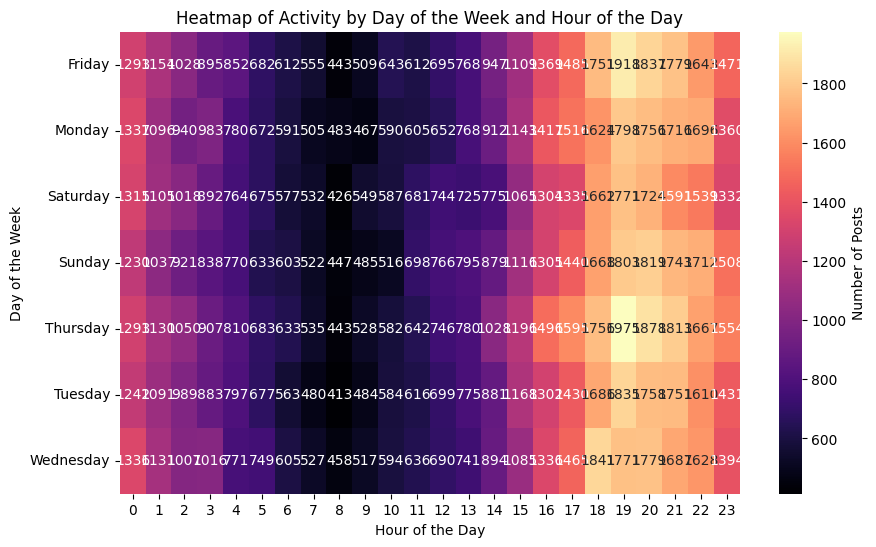

In [23]:
# Identify peak activity periods (for hour of the day and day of the week)
# Peak activity by hour (find the hour with the highest activity)
peak_hour = df.groupby('Hour').size().idxmax()
print(f"The peak hour of activity is: {peak_hour} o'clock")

# Peak activity by day of the week (find the day with the highest activity)
peak_day_of_week = df.groupby('Day_of_Week').size().idxmax()
print(f"The peak day of the week for activity is: {peak_day_of_week}")

# Optionally, plot a heatmap of activity over the day of the week and hour of the day
activity_heatmap = df.groupby(['Day_of_Week', 'Hour']).size().unstack().fillna(0)

# Set figure size and create the heatmap
plt.figure(figsize=(10, 6))

# Change the color set for the heatmap
sns.heatmap(activity_heatmap, cmap="magma", annot=True, fmt="d", cbar_kws={'label': 'Number of Posts'})

# Titles and labels
plt.title('Heatmap of Activity by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# Show the plot
plt.show()

3- Seasonality

In [24]:
# Generate the full range of dates between the minimum and maximum of the current index
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D').difference(df.index)

# Create a DataFrame for missing dates
missing_dates_df = pd.DataFrame(missing_dates, columns=['Missing Dates'])

# Display the missing dates in a table format
print("Missing Dates Table:")
print(missing_dates_df)

# Calculate the total count of missing dates
total_missing = len(missing_dates)

# Display the total count of missing dates
print("\nTotal Missing Dates:", total_missing)

Missing Dates Table:
           Missing Dates
0    2010-10-29 14:38:00
1    2010-10-30 14:38:00
2    2010-10-31 14:38:00
3    2010-11-01 14:38:00
4    2010-11-02 14:38:00
...                  ...
3960 2021-11-28 14:38:00
3961 2021-11-29 14:38:00
3962 2021-11-30 14:38:00
3963 2021-12-01 14:38:00
3964 2021-12-02 14:38:00

[3965 rows x 1 columns]

Total Missing Dates: 3965


Number of NaN values after handling missing data: 0


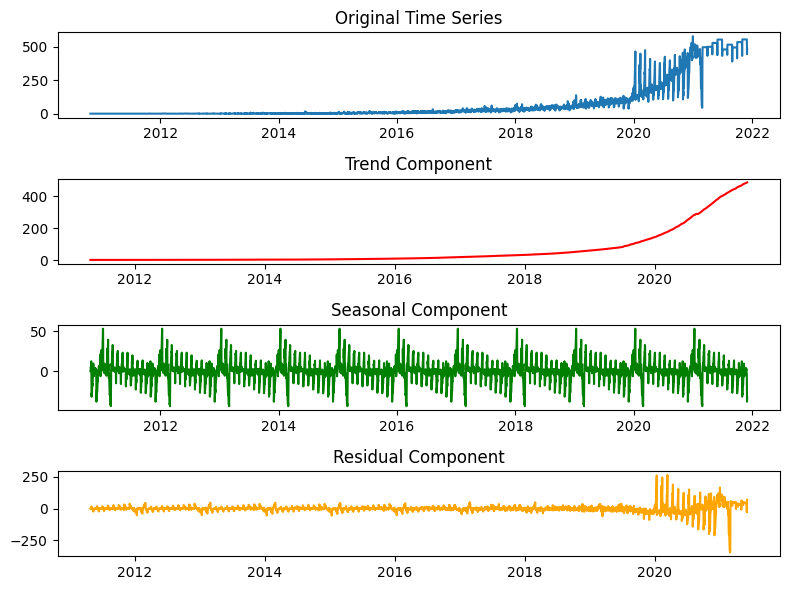

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily frequency, getting the count of posts per day
daily_data = df.resample('D').size()

# Replace zeros with NaN to treat missing days as NaN
daily_data[daily_data == 0] = np.nan

# Optionally, forward-fill or backward-fill missing values if needed
# For example, forward-fill the missing values
daily_data = daily_data.fillna(method='ffill')  # or use 'bfill' for backward fill

# Check for remaining NaN values
num_nans = daily_data.isna().sum()
print(f"Number of NaN values after handling missing data: {num_nans}")

# Decompose the time series data
decomposition = seasonal_decompose(daily_data, model='additive', period=365)  # period=365 for yearly seasonality

# Plot the decomposed components
plt.figure(figsize=(8, 6))

# Plot the observed (original) series
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, color='red')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, color='green')
plt.title('Seasonal Component')

# Plot the residual (remainder) component
plt.subplot(414)
plt.plot(decomposition.resid, color='orange')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [26]:
# Group the original data by 'Date Posted' and count the entries for each date
original_grouped = df.groupby(df.index.date).size()

# Count of the grouped original data (unique dates)
original_count = len(original_grouped)

# Count of the resampled data (using the index of the resampled DataFrame)
resampled_count = len(daily_data.index)

# Print both counts
print("Grouped Original Data Count:", original_count)
print("Resampled Data Count:", resampled_count)

# Calculate and print the difference in counts
difference = resampled_count - original_count
print("Difference in Count:", difference)

Grouped Original Data Count: 2907
Resampled Data Count: 4054
Difference in Count: 1147


In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The data is not stationary, perform differencing.")

ADF Statistic: 1.9848346486518427
p-value: 0.9986529184444098
The data is not stationary, perform differencing.


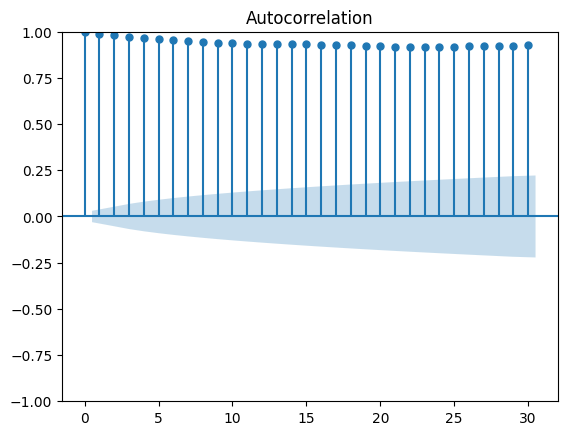

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation Function (ACF)
plot_acf(daily_data, lags=30)
plt.show()

In [29]:
# Apply first differencing
daily_data_diff = daily_data.diff().dropna()

# Check stationarity again
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The data is not stationary")
else:
    print("The data is stationary")

ADF Statistic: -16.17253853508713
p-value: 4.3496426123691503e-29
The data is stationary


Note:
- Before differencing, the time series exhibited characteristics of non-stationarity, as evidenced by the ACF statistic of 1.98 and a p-value of 0.99, which indicated that the null hypothesis of non-stationarity could not be rejected.
- After applying first differencing, the series became stationary, as indicated by the much more negative ADF statistic of -1.17 and a p-value of 4.35, which strongly rejects the null hypothesis of non-stationarity.
- The initial differentiation effectively converted the data into a stationary series, making it appropriate for subsequent time series modeling, such as ARIMA or other techniques that require stationary data.

In [30]:
# Get the minimum and maximum values of your time series data (daily_data)
min_value = daily_data_diff.min()
max_value = daily_data_diff.max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: -360.0
Maximum value: 367.0


4- Time Series using SARIMA
- Purpose: forecasting or predicting future values based on past data that is indexed by time.

SARIMA - Average MAE: 17.870844144717275, Average RMSE: 27.580839297839894


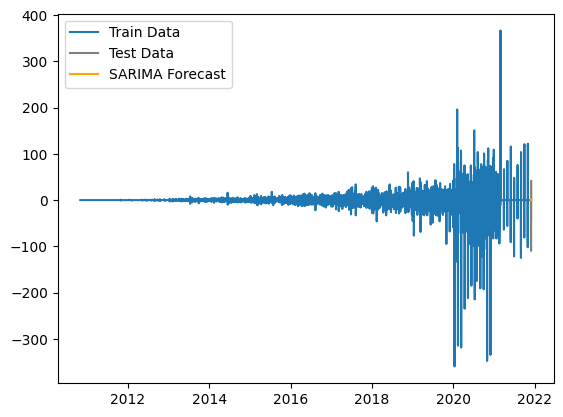

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function for time-series cross-validation
def time_series_cv(data, n_splits):
    split_size = len(data) // n_splits
    for i in range(n_splits):
        train = data[:(split_size * (i + 1))]
        test = data[(split_size * (i + 1)):(split_size * (i + 2))]
        yield train, test

# Evaluation function for MAE and RMSE
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Cross-validation for SARIMA model
sarima_mae = []
sarima_rmse = []

for train, test in time_series_cv(daily_data_diff, n_splits=5):
    # Fit SARIMA model on differenced data
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    sarima_fit = sarima_model.fit(disp=False)

    # Forecast for the test period
    forecast = sarima_fit.get_forecast(steps=len(test))
    forecast_index = test.index  # Use the test data index

    # Calculate error metrics
    mae, rmse = evaluate_model(test, forecast.predicted_mean)
    sarima_mae.append(mae)
    sarima_rmse.append(rmse)

# Calculate average performance metrics across all folds
average_mae = np.mean(sarima_mae)
average_rmse = np.mean(sarima_rmse)

print(f"SARIMA - Average MAE: {average_mae}, Average RMSE: {average_rmse}")

# Plot the results for the last fold
train, test = list(time_series_cv(daily_data_diff, n_splits=5))[-1]  # Last fold
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

forecast = sarima_fit.get_forecast(steps=len(test))
forecast_index = test.index
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data', color='gray')
plt.plot(forecast_index, forecast.predicted_mean, label='SARIMA Forecast', color='orange')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='orange', alpha=0.3)
plt.legend()
plt.show()

Note: Range of Data: The minimum value is -360, and the maximum is 367, giving a range of 727 units.

RMSE in Context: With an RMSE of 27.58, the model's forecast is on average within 27.58 units of the actual values. This is about 3.8% of the total range (727 units), indicating a relatively small error in the forecast given the scale of the data.

Average MAE: The average Mean Absolute Error (MAE) is 17.87, which means the model's forecast is typically off by about 17.87 units from the actual values. This suggests a reasonable level of accuracy in capturing the underlying trend and variability of the data.

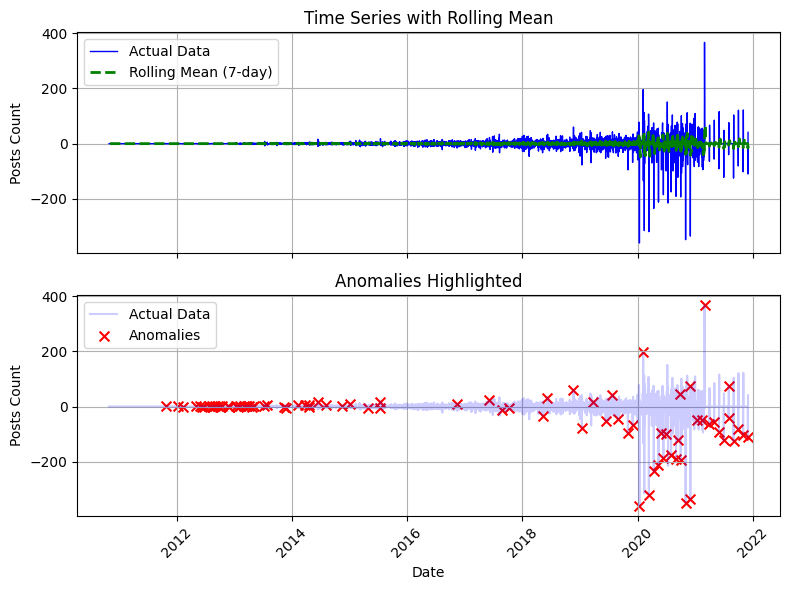

In [32]:
# Compute rolling mean and standard deviation
rolling_mean = daily_data_diff.rolling(window=7).mean()
rolling_std = daily_data_diff.rolling(window=7).std()

# Identify anomalies
anomalies = daily_data_diff[(daily_data_diff > rolling_mean + 2 * rolling_std) | (daily_data_diff < rolling_mean - 2 * rolling_std)]

# Create subplots to reduce clutter
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot the actual data and rolling mean on the first subplot
ax1.plot(daily_data_diff, label='Actual Data', color='blue', linewidth=1)
ax1.plot(rolling_mean, label='Rolling Mean (7-day)', color='green', linestyle='--', linewidth=2)
ax1.set_title('Time Series with Rolling Mean', fontsize=12)
ax1.set_ylabel('Posts Count', fontsize=10)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot only the anomalies on the second subplot
ax2.plot(daily_data_diff, label='Actual Data', color='blue', alpha=0.2)  # Lightly plot the data for context
ax2.scatter(anomalies.index, anomalies, color='red', label='Anomalies', s=50, marker='x')
ax2.set_title('Anomalies Highlighted', fontsize=12)
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Posts Count', fontsize=10)
ax2.legend(loc='upper left')
ax2.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**Note:**
**Rolling Mean (Moving Average)**: is a statistical method that smooths out data fluctuations (reduces noise) by averaging values over a specified time frame, producing a smoother curve compared to the raw data. This makes underlying trends more apparent. A consistent upward or downward movement in the rolling mean indicates a stable trend, while a stable mean suggests minimal change.
- In this context, a 7-day rolling window is employed, meaning each data point represents the average of the past 7 days, including the current day.

**Anomalies (Outliers)**: are pinpointed by examining data points that significantly diverge from the expected pattern based on the rolling mean and standard deviation.
- Anomalies are detected by comparing individual data points to the rolling mean ± 2 times the rolling standard deviation.
- This approach assumes that the data follows a roughly normal distribution, in which extreme values (outliers) are uncommon.

Deep Learning with Long short-term memory (LSTM)
- Data Normalization Using MinMaxScaler and Train-Test Split for Time Series Forecasting

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Preview the data
print(daily_data.head())

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(daily_data.values.reshape(-1, 1))  # Scaling the data

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 60  # Use last 60 days to predict the next day

# Create dataset
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Date Posted
2010-10-28    1.0
2010-10-29    1.0
2010-10-30    1.0
2010-10-31    1.0
2010-11-01    1.0
Freq: D, dtype: float64


Build the LSTM Model

In [34]:
# pip install keras-tuner

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 200ms/step - loss: 4.0299e-04 - val_loss: 0.0129
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - loss: 1.6868e-04 - val_loss: 0.0118
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - loss: 1.6183e-04 - val_loss: 0.0110
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - loss: 1.4561e-04 - val_loss: 0.0106
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - loss: 1.7197e-04 - val_loss: 0.0096
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - loss: 1.5539e-04 - val_loss: 0.0115
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - loss: 1.6726e-04 - val_loss: 0.0095
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - loss: 1.4613e-04 - val_loss: 0.0142
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - loss: 1.3881e-04 - val_loss: 0.0093
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - loss: 1.5655e-04 - val_loss: 0.0111
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - loss: 1.593

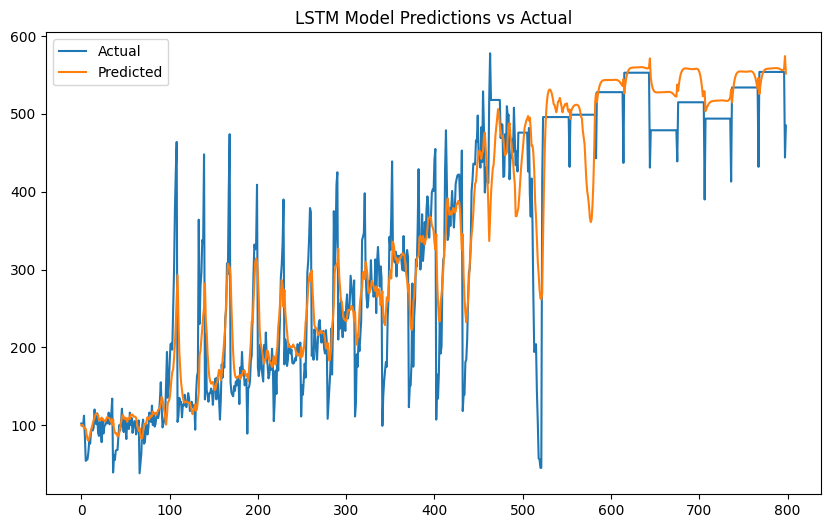

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

# Build the LSTM model
model = Sequential()

# First LSTM layer with 100 units, Bidirectional, and Dropout
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))

# Second LSTM layer with 50 units and Dropout
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))

# Output layer with 1 unit (regression task)
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping: stop if validation loss does not improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model with early stopping (use 20 epochs)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[early_stopping])

# Make predictions using the trained model
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inversed = scaler.inverse_transform(predictions)

# Inverse transform the actual test data
y_test_inversed = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model using RMSE
rmse = sqrt(mean_squared_error(y_test_inversed, predictions_inversed))
print(f'Test RMSE: {rmse}')

# Add Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inversed, predictions_inversed)
print(f'Test MAE: {mae}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, label='Actual')
plt.plot(predictions_inversed, label='Predicted')
plt.legend()
plt.title('LSTM Model Predictions vs Actual')
plt.show()

Descriptive Statistics II: Weekdays, Weekends & Average Hour

In [36]:
from sklearn.preprocessing import LabelEncoder

# Check the shape of your DataFrame
print("Original DataFrame shape:", df.shape)

# Apply LabelEncoder to the 'Day_Type' column to get numeric encoding
label_encoder = LabelEncoder()

# Apply the encoding directly to the existing 'Day_Type' column
df['Day_Type_encoded'] = label_encoder.fit_transform(df['Day_Type'])

# Display the first few rows to confirm the encoding
print(df[['Day_of_Week', 'Day_Type', 'Day_Type_encoded']].head())

Original DataFrame shape: (178922, 9)
                    Day_of_Week Day_Type  Day_Type_encoded
Date Posted                                               
2019-12-05 21:18:00    Thursday  Weekday                 0
2019-12-05 14:25:00    Thursday  Weekday                 0
2019-03-05 15:18:00     Tuesday  Weekday                 0
2019-02-05 16:40:00     Tuesday  Weekday                 0
2019-04-25 16:51:00    Thursday  Weekday                 0


In [37]:
# Compute basic statistics for weekdays and weekends
weekday_data = df[df['Day_Type_encoded'] == 0]  # Weekdays
weekend_data = df[df['Day_Type_encoded'] == 1]  # Weekends

# Get the count of posts per day of the week for weekdays and weekends
weekday_counts = weekday_data['Day_of_Week'].value_counts()
weekend_counts = weekend_data['Day_of_Week'].value_counts()

# Get average hour of activity for weekdays and weekends
weekday_avg_hour = weekday_data['Hour'].mean()
weekend_avg_hour = weekend_data['Hour'].mean()

print("Weekday Counts:")
print(weekday_counts)

print("\nWeekend Counts:")
print(weekend_counts)

print(f"\nAverage Hour for Weekdays: {weekday_avg_hour}")
print(f"Average Hour for Weekends: {weekend_avg_hour}")


Weekday Counts:
Day_of_Week
Thursday     26720
Friday       26050
Wednesday    25658
Monday       25407
Tuesday      25145
Name: count, dtype: int64

Weekend Counts:
Day_of_Week
Sunday      25254
Saturday    24688
Name: count, dtype: int64

Average Hour for Weekdays: 13.39627849278958
Average Hour for Weekends: 13.396840334788354


**Note:** Weekdays tend to have more activity on Instagram compared to weekends, with Thursday and Friday being the days that see the highest number of posts. Although activity decreases over the weekend, Sunday exhibits more interaction than Saturday.

In general, regardless of whether it is a weekday or weekend, the peak activity on Instagram occurs around 13:40 min.

**Insight:** This information is vital for marketing companies to post their advertisements at times of highest activity, enabling them to reach a larger audience and convert them into potential customers.

Encode Categorical Data

In [38]:
# Encode 'Day_of_Week' using LabelEncoder
le_day = LabelEncoder()
df['Day_of_Week_encoded'] = le_day.fit_transform(df['Day_of_Week'])

# Encode 'Type' column using LabelEncoder
le_type = LabelEncoder()
df['Type_encoded'] = le_type.fit_transform(df['Type'])  # For multiple categories like Image, Images, Video

# Display the first few rows to confirm the encoding
print(df[['Day_of_Week', 'Day_Type', 'Day_of_Week_encoded', 'Type', 'Type_encoded']].head())

                    Day_of_Week Day_Type  Day_of_Week_encoded    Type  \
Date Posted                                                             
2019-12-05 21:18:00    Thursday  Weekday                    4   Image   
2019-12-05 14:25:00    Thursday  Weekday                    4   Image   
2019-03-05 15:18:00     Tuesday  Weekday                    5  Images   
2019-02-05 16:40:00     Tuesday  Weekday                    5  Images   
2019-04-25 16:51:00    Thursday  Weekday                    4  Images   

                     Type_encoded  
Date Posted                        
2019-12-05 21:18:00             0  
2019-12-05 14:25:00             0  
2019-03-05 15:18:00             1  
2019-02-05 16:40:00             1  
2019-04-25 16:51:00             1  


**Machine Learning Models**: Supervised & Unsupervised learning.

1- Classification model: Random Forest
- Purpose: predict categorical outcomes based on input features. In the context of imbalanced datasets, Random Forest has an edge over other algorithms like Logistic Regression because it is an ensemble learning method that naturally handles imbalances better.
- In this case, the model is trained on labeled data and classifies new instances into predefined categories. Specifically, the categories are Weekday and Weekend, determined by the hour of the day.

1.1- Prepare Data for Classification

In [39]:
# Features: Day of week and Hour
X = df[['Day_of_Week_encoded', 'Hour']]  # 'Hour' is already numeric, 'Day_of_Week' is encoded
y = df['Type_encoded']  # Target: Post Type (0 or 1)

1.2- Split Data into Train and Test Sets

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

1.3 Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize RandomForestClassifier with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.29      0.40     34255
           1       0.21      0.24      0.22     10867
           2       0.17      0.52      0.26      8555

    accuracy                           0.32     53677
   macro avg       0.35      0.35      0.29     53677
weighted avg       0.49      0.32      0.34     53677




Summary of Tree Depths in the Random Forest:
Mean Depth: 12.74
Min Depth: 11
Max Depth: 15
Standard Deviation of Depths: 0.94


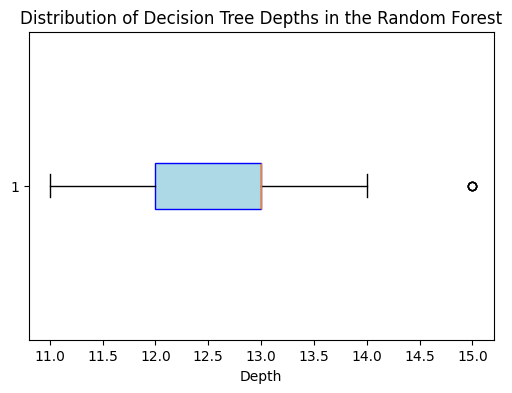

In [42]:
from sklearn.tree import export_text

# Fit the Random Forest model first
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model with your training data

# Extract the depths of all trees in the RandomForest
tree_depths = [tree.get_depth() for tree in rf_model.estimators_]

# Summary statistics
mean_depth = np.mean(tree_depths)
min_depth = np.min(tree_depths)
max_depth = np.max(tree_depths)
std_depth = np.std(tree_depths)

# Print summary statistics
print(f"\nSummary of Tree Depths in the Random Forest:")
print(f"Mean Depth: {mean_depth:.2f}")
print(f"Min Depth: {min_depth}")
print(f"Max Depth: {max_depth}")
print(f"Standard Deviation of Depths: {std_depth:.2f}")

# Visualizing the distribution of tree depths (using a histogram or boxplot)
plt.figure(figsize=(6, 4))

# Boxplot for a concise summary of tree depth distribution
plt.boxplot(tree_depths, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Distribution of Decision Tree Depths in the Random Forest')
plt.xlabel('Depth')
plt.show()

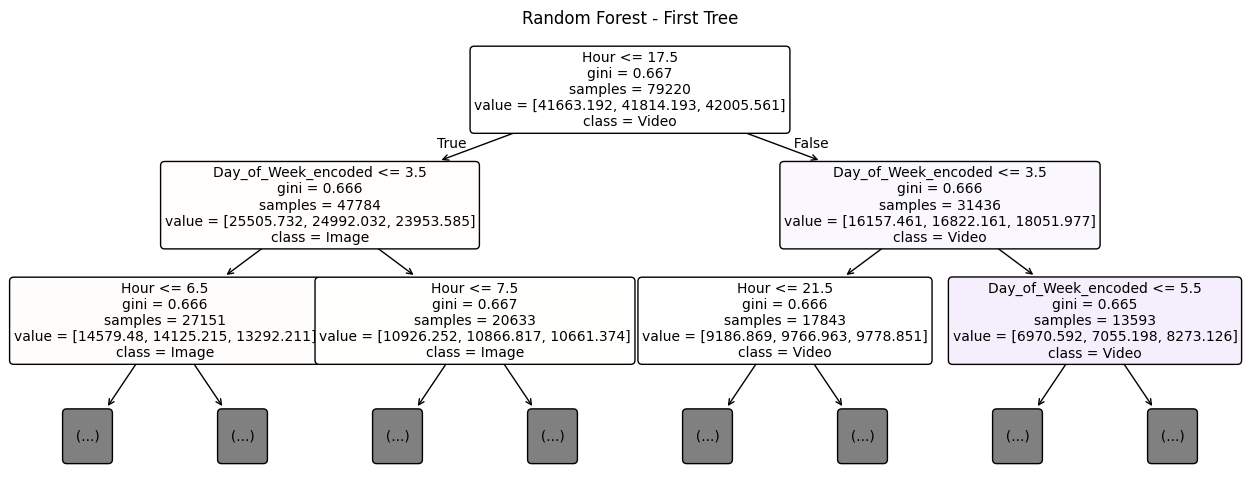

In [43]:
from sklearn.tree import plot_tree

# Display the first tree in a Random Forest
plt.figure(figsize=(16, 6))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=le_type.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=2)  # Limit the depth for readability
plt.title("Random Forest - First Tree")
plt.show()

1.4 K-fold cross-validation


In [44]:
from sklearn.model_selection import cross_val_score

# Initialize RandomForestClassifier with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation and get the accuracy scores
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and the average score
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.31292441 0.33170323 0.30762352 0.2846803  0.32271406]
Mean cross-validation score: 0.31192910447329936


2- Clustering Model:
- Purpose: group similar data points together based on some criteria, without requiring labeled data. The goal is to find natural groupings or patterns in the data.

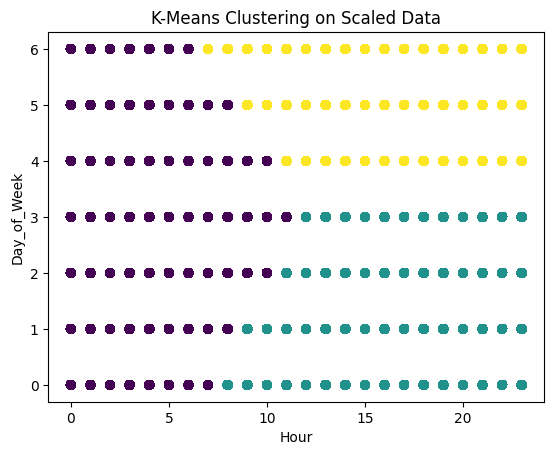

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cluster based on 'Hour' and 'Day_of_Week'
X = df[['Hour', 'Day_of_Week_encoded']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters
kmeans.fit(X_scaled)

# Assign clusters to the original data
df['Cluster'] = kmeans.labels_

# Visualize the results
plt.scatter(df['Hour'], df['Day_of_Week_encoded'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on Scaled Data')
plt.xlabel('Hour')
plt.ylabel('Day_of_Week')
plt.show()

In [46]:
# Analyze the clusters by calculating the mean of each feature for each cluster
cluster_means = df.groupby('Cluster')[['Hour', 'Day_of_Week_encoded']].mean()

# Display the table with cluster means
print("Cluster Means:")
print(cluster_means)

Cluster Means:
              Hour  Day_of_Week_encoded
Cluster                                
0         3.526232             2.968151
1        17.771651             1.435194
2        17.510756             5.016619


Reference:
- https://www.kaggle.com/datasets/vasileiosmpletsos/1100-instagram-users-datetime-posts-data
- https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python
- https://scikit-learn.org/stable/supervised_learning.html
- https://scikit-learn.org/stable/modules/ensemble.html
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
- https://www.kaggle.com/code/kmkarakaya/keras-lstm-explained-in-details



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Take a smaller sample (e.g., 10% of the training data) for faster hyperparameter tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the RandomForestClassifier with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search on the training data (sample)
# grid_search.fit(X_train_sample, y_train_sample)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Get the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

RESULT:
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.65      0.33      0.44     34255
           1       0.21      0.36      0.26     10867
           2       0.17      0.35      0.23      8555

    accuracy                           0.34     53677
   macro avg       0.34      0.35      0.31     53677
weighted avg       0.48      0.34      0.37     53677